In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt'
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt'
path = '../data/line_4/'
file = 'F_2_L45.I_S5209MI'
fileb = 'F_2_L45.I_S5209bMI'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('../data/line_4'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path2)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [2]:
t = loadData(path,file)

../data/line_4/20180414/20180414_F_2_L45.I_S5209MI.txt
../data/line_4/20180421/20180421_F_2_L45.I_S5209MI.txt
../data/line_4/20180428/20180428_F_2_L45.I_S5209MI.txt
../data/line_4/20180505/20180505_F_2_L45.I_S5209MI.txt
../data/line_4/20180512/20180512_F_2_L45.I_S5209MI.txt
../data/line_4/20180519/20180519_F_2_L45.I_S5209MI.txt
../data/line_4/20180526/20180526_F_2_L45.I_S5209MI.txt
../data/line_4/20180602/20180602_F_2_L45.I_S5209MI.txt
../data/line_4/20180609/20180609_F_2_L45.I_S5209MI.txt
../data/line_4/20180616/20180616_F_2_L45.I_S5209MI.txt
../data/line_4/20180623/20180623_F_2_L45.I_S5209MI.txt
../data/line_4/20180630/20180630_F_2_L45.I_S5209MI.txt
../data/line_4/20180707/20180707_F_2_L45.I_S5209MI.txt
../data/line_4/20180714/20180714_F_2_L45.I_S5209MI.txt


In [3]:
tb = loadData(path,fileb)

../data/line_4/20180414/20180414_F_2_L45.I_S5209bMI.txt
../data/line_4/20180421/20180421_F_2_L45.I_S5209bMI.txt
../data/line_4/20180428/20180428_F_2_L45.I_S5209bMI.txt
../data/line_4/20180505/20180505_F_2_L45.I_S5209bMI.txt
../data/line_4/20180512/20180512_F_2_L45.I_S5209bMI.txt
../data/line_4/20180519/20180519_F_2_L45.I_S5209bMI.txt
../data/line_4/20180526/20180526_F_2_L45.I_S5209bMI.txt
../data/line_4/20180602/20180602_F_2_L45.I_S5209bMI.txt
../data/line_4/20180609/20180609_F_2_L45.I_S5209bMI.txt
../data/line_4/20180616/20180616_F_2_L45.I_S5209bMI.txt
../data/line_4/20180623/20180623_F_2_L45.I_S5209bMI.txt
../data/line_4/20180630/20180630_F_2_L45.I_S5209bMI.txt
../data/line_4/20180707/20180707_F_2_L45.I_S5209bMI.txt
../data/line_4/20180714/20180714_F_2_L45.I_S5209bMI.txt


In [4]:
print(len(t))
print(len(tb))

1963210
2002775


In [5]:
data = pd.DataFrame(t)
datab = pd.DataFrame(tb)

In [6]:
data.head()

,quality,ts,value
0,优,2018-04-14 08:00:00.501,130.259827
1,优,2018-04-14 08:00:03.058,128.563889
2,优,2018-04-14 08:00:04.372,128.679764
3,优,2018-04-14 08:00:08.237,128.563889
4,优,2018-04-14 08:00:10.822,128.679764


In [7]:
datab.head()

,quality,ts,value
0,优,2018-04-14 08:00:01.795,132.334961
1,优,2018-04-14 08:00:04.372,135.273865
2,优,2018-04-14 08:00:06.926,132.334961
3,优,2018-04-14 08:00:09.514,133.799149
4,优,2018-04-14 08:00:12.129,132.334961


In [8]:
data.value = pd.to_numeric(data.value, errors='ignore')
datab.value = pd.to_numeric(datab.value,errors = 'ignore')

data = data[data['value']> 0]
datab = datab[datab['value'] > 0]

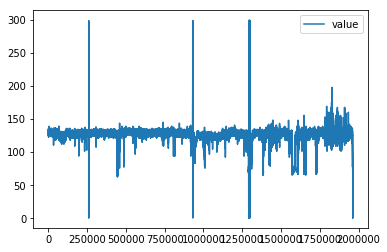

In [9]:
data.plot()

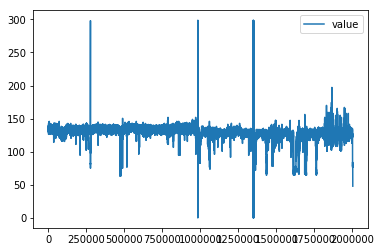

In [10]:
datab.plot()

In [11]:
new_ts = [data['ts'].iloc[i][0:13] for i in range(0,len(data))]

In [12]:
new_tsb = [datab['ts'].iloc[i][0:13] for i in range(0,len(datab))]

In [13]:
data.drop('ts',axis=1, inplace=True)
datab.drop('ts',axis = 1,inplace = True)

In [14]:
data.insert(1,'ts',new_ts)
datab.insert(1,'ts',new_tsb)

In [15]:
grouped = data['value'].groupby(data['ts'])
groupedb = datab['value'].groupby(datab['ts'])

In [16]:
d1 = grouped.mean()
d2 = groupedb.mean()

In [17]:
d1 = pd.DataFrame(d1)

In [18]:
d2 = pd.DataFrame(d2)

In [19]:
data_all = pd.merge(d1,d2,left_index= True, right_index=True)

In [20]:
data_all.head()

,value_x,value_y
ts,,
2018-04-14 08,129.998389,134.798064
2018-04-14 09,130.183292,134.999870
2018-04-14 10,132.322917,137.338072
2018-04-14 11,132.854250,138.004280
2018-04-14 12,132.152613,137.333174


Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

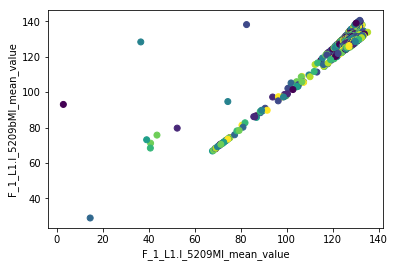

In [21]:
#提升机A电流与提升机B电流结果反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all.value_x,data_all.value_y,c = c,marker = 'o')
plt.xlabel('F_1_L1.I_5209MI_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')